In [28]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

## Using DNN

In [29]:
mnist = tf.keras.datasets.fashion_mnist

In [30]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
training_images = training_images/255.0
test_images = test_images/255.0

In [32]:
model = Sequential([Flatten(),
                   Dense(128,activation = tf.nn.relu),
                   Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images, training_labels, epochs = 5)

test_loss = model.evaluate(test_images, test_labels)
print(test_loss)

Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.5037 - accuracy: 0.8240
Epoch 2/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.3791 - accuracy: 0.8632
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.3377 - accuracy: 0.8771
Epoch 4/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.3135 - accuracy: 0.8858
Epoch 5/5
10000/10000 [==============================] - 0s 14us/step
[0.34750052421092986, 0.8758999705314636]


## Using CNN

Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details.

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

#### Parameters
**filters**: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
**kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.

In [50]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0


model2 = Sequential([Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu'),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])

model2.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics =['accuracy'])
model2.summary()
model2.fit(training_images,training_labels, epochs = 5)
print("Test Loss is {}".format(model.evaluate(test_images,test_labels)))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_32 (Dense)             (None, 10)              

It's likely gone up to about 93% on the training data and 91% on the validation data.

That's significant, and a step in the right direction!

Try running it for more epochs -- say about 20, and explore the results! But while the results might seem really good, the validation results may actually go down, due to something called 'overfitting' which will be discussed later.

(In a nutshell, 'overfitting' occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at seeing other data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it, but blue suade shoes might confuse you...and you know you should never mess with my blue suede shoes.)

Then, look at the code again, and see, step by step how the Convolutions were built:

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)

The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32

The size of the Convolution, in this case a 3x3 grid

The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0

In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way.

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[;100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge. Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

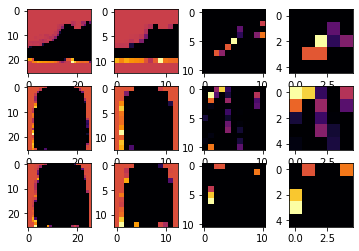

In [52]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')  
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
    axarr[2,x].grid(False)

EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images/255.0
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images/255.0


model3 = Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])

model3.compile(optimizer = 'adam', loss = "sparse_categorical_crossentropy", metrics =['accuracy'])
model3.summary()
model3.fit(training_images,training_labels, epochs = 10)
print("Test Loss is {}".format(model.evaluate(test_images,test_labels)))

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_40 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 17s 280us/step - loss: 0.3848 - accuracy: 0.8629
Epoch 